In [ ]:
#Importing the Required Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from termcolor import cprint
# Color palette for plots
colorpalt = ["#d62828", "#f77f00", "#fcbf49", "#003049"]
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv',sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("Number of datapoints:", len(df))

Number of datapoints: 2240


In [ ]:
#Checking data dimension
print('Dimension of Data:', df.shape)

Dimension of Data: (2240, 29)


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Checking for Null Values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
# Identifying the unique number of values in the dataset
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
print(df.apply(lambda col: col.unique()))

ID                     [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
Year_Birth             [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...
Education                     [Graduation, PhD, Master, Basic, 2n Cycle]
Marital_Status         [Single, Together, Married, Divorced, Widow, A...
Income                 [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome                                                        [0, 1, 2]
Teenhome                                                       [0, 1, 2]
Dt_Customer            [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...
Recency                [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...
MntWines               [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...
MntFruits              [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...
MntMeatProducts        [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...
MntFishProducts        [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...
MntSweetProducts       [88, 1, 21, 3, 27, 42, 49, 2

<Axes: >

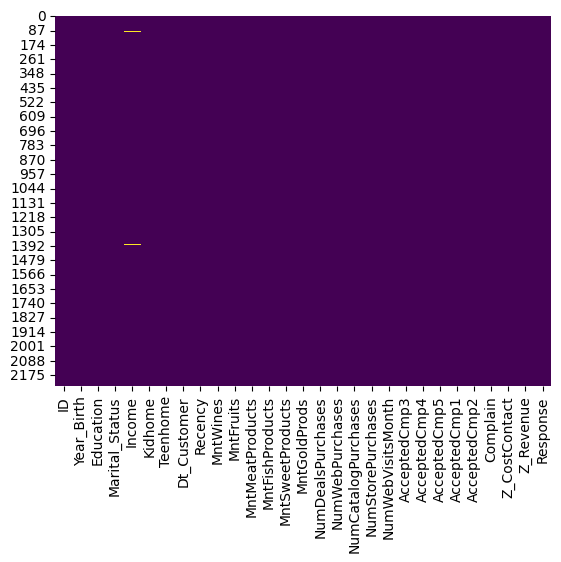

In [ ]:
#Visualizing the null values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Remove the NA values
df = df.dropna()

In [ ]:
# Checking again for Null Values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# Viewing the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [ ]:
# Feature Engineering
# Age of customer today
df["Age"] = 2024 - df["Year_Birth"]

# Total spendings on various items
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Deriving living situation by marital status "Alone"
df["Living_With"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"})

# Feature indicating total children living in the household
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

# Feature pertaining parenthood
df["Is_Parent"] = np.where(df["Children"] > 0, 1, 0)

# Segmenting education levels into three groups
df["Education"] = df["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

# For clarity
df = df.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

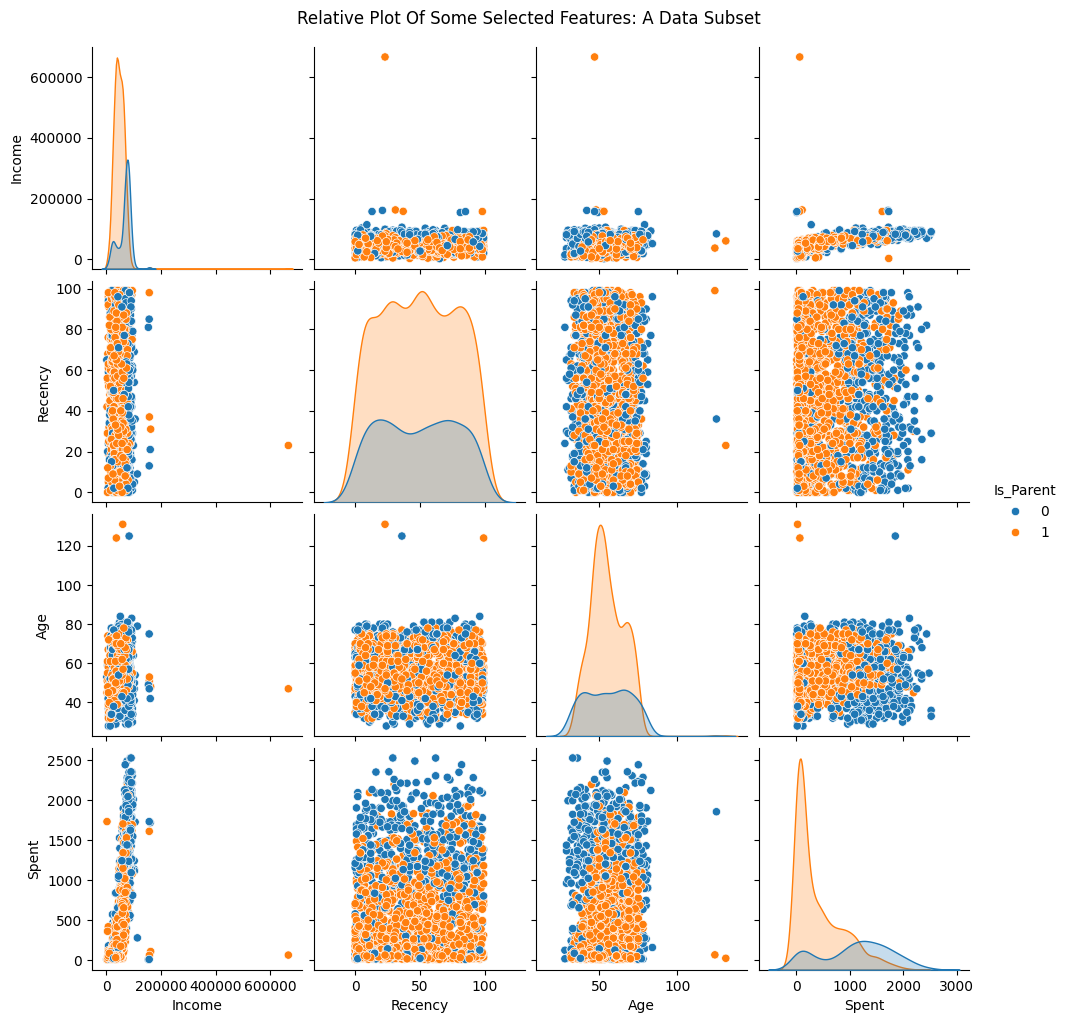

In [ ]:
# Plotting the selected features without specifying color preferences
To_Plot = ["Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue="Is_Parent")
# Adding a title
plt.suptitle("Relative Plot Of Some Selected Features: A Data Subset", y=1.02)
# Display the plot
plt.show()

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

**Age Vs Income**

In [ ]:
df.Age.value_counts()

48     89
53     86
49     83
52     78
46     76
54     75
59     74
51     72
55     70
50     69
68     55
45     53
66     52
47     52
72     52
56     51
58     50
65     50
70     49
64     49
69     48
42     44
61     44
62     44
57     44
73     42
41     41
38     41
67     41
60     41
44     39
43     38
40     38
63     35
71     35
39     32
75     30
35     29
36     29
74     29
37     27
76     21
34     18
78     16
77     16
33     15
32     13
79      8
80      7
81      6
29      5
31      5
30      3
28      2
125     1
83      1
131     1
124     1
84      1
Name: Age, dtype: int64

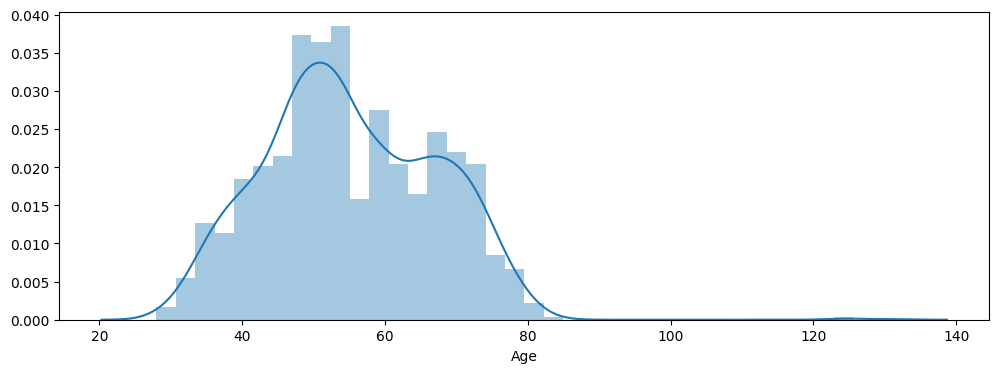

In [ ]:
plt.figure(figsize=(12,4))

sns.distplot(df['Age'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

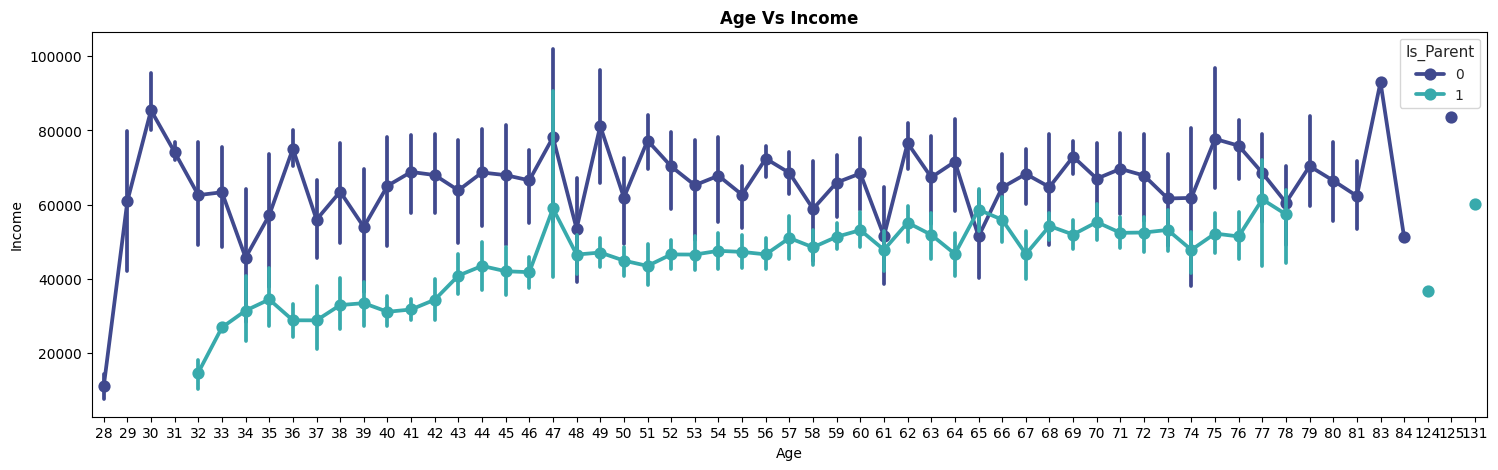

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set_style("whitegrid")
sns.pointplot(x=df["Age"], y=df["Income"], hue=df["Is_Parent"], ax=ax,palette="mako")
ax.set(xlabel='Age', ylabel='Income')
# Set the legend title to 'Season Name'
ax.legend(title='Is_Parent', title_fontsize='11')
# Set the title and make it bold
ax.set_title('Age Vs Income', fontweight='bold')

plt.show()

In [ ]:
df.Education.value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

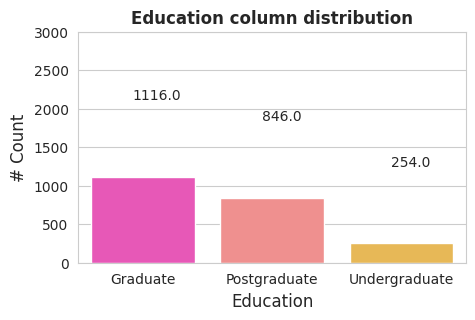

In [ ]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="Education", data=df, palette="spring")

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# Count", fontsize= 12)
plt.ylim(0,3000)
plt.title('Education column distribution',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

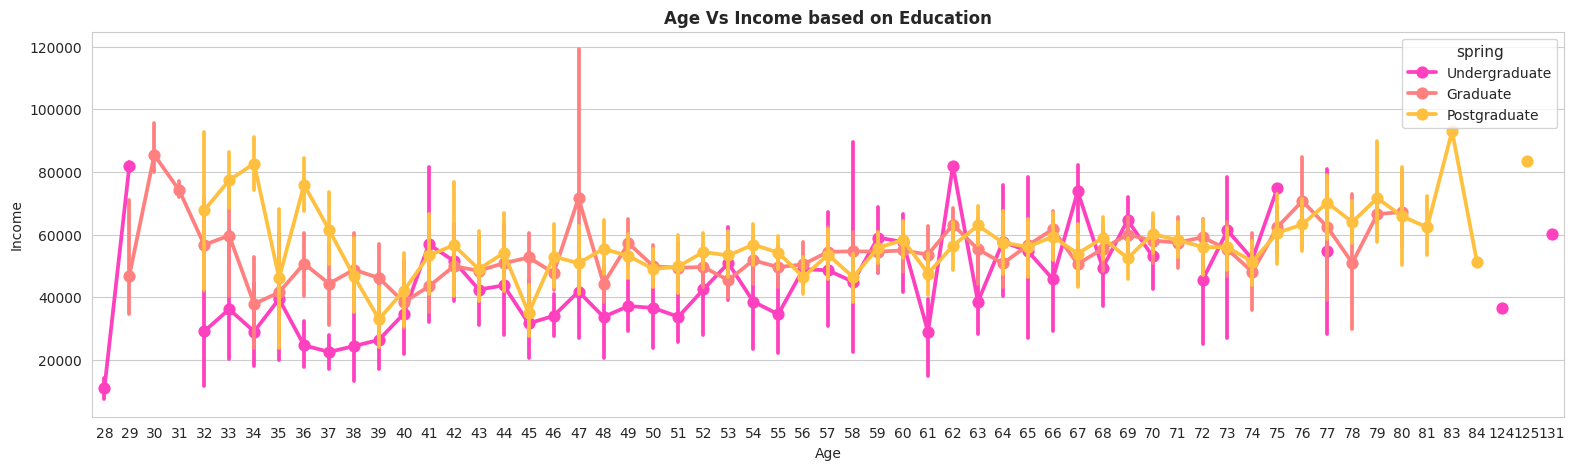

In [ ]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.set_style("whitegrid")
sns.pointplot(x=df["Age"], y=df["Income"], hue=df["Education"], ax=ax,palette="spring")
ax.set(xlabel='Age', ylabel='Income')
# Set the legend title to 'Season Name'
ax.legend(title='spring', title_fontsize='11')
# Set the title and make it bold
ax.set_title('Age Vs Income based on Education', fontweight='bold')

plt.show()

**Age vs Spent**

In [ ]:
df.Spent.value_counts()

22      18
46      18
57      16
55      15
44      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: Spent, Length: 1047, dtype: int64

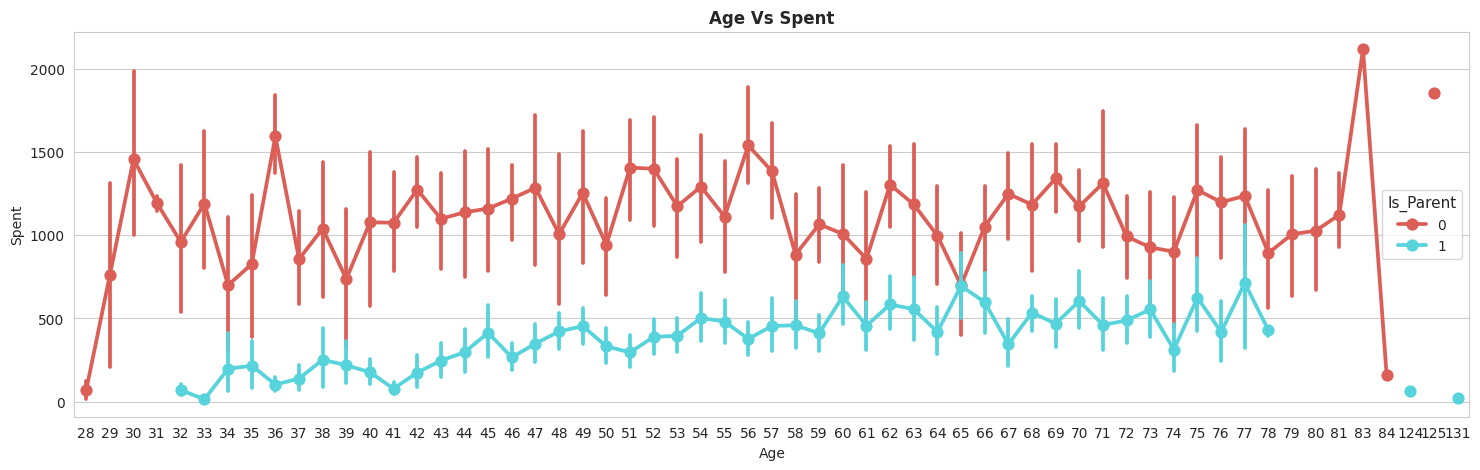

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set_style("whitegrid")
sns.pointplot(x=df["Age"], y=df["Spent"], hue=df["Is_Parent"], ax=ax,palette="hls")
ax.set(xlabel='Age', ylabel='Spent')
# Set the legend title to 'Season Name'
ax.legend(title='Is_Parent', title_fontsize='11')
# Set the title and make it bold
ax.set_title('Age Vs Spent', fontweight='bold')

plt.show()

In [ ]:
df.Living_With.value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

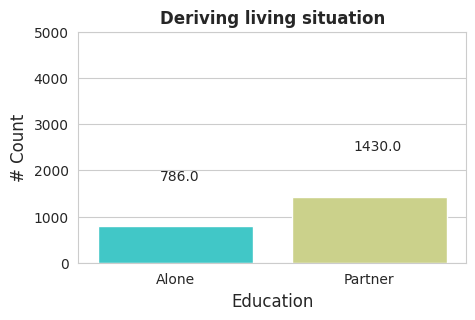

In [ ]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="Living_With", data=df, palette="rainbow")

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# Count", fontsize= 12)
plt.ylim(0,5000)
plt.title('Deriving living situation',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

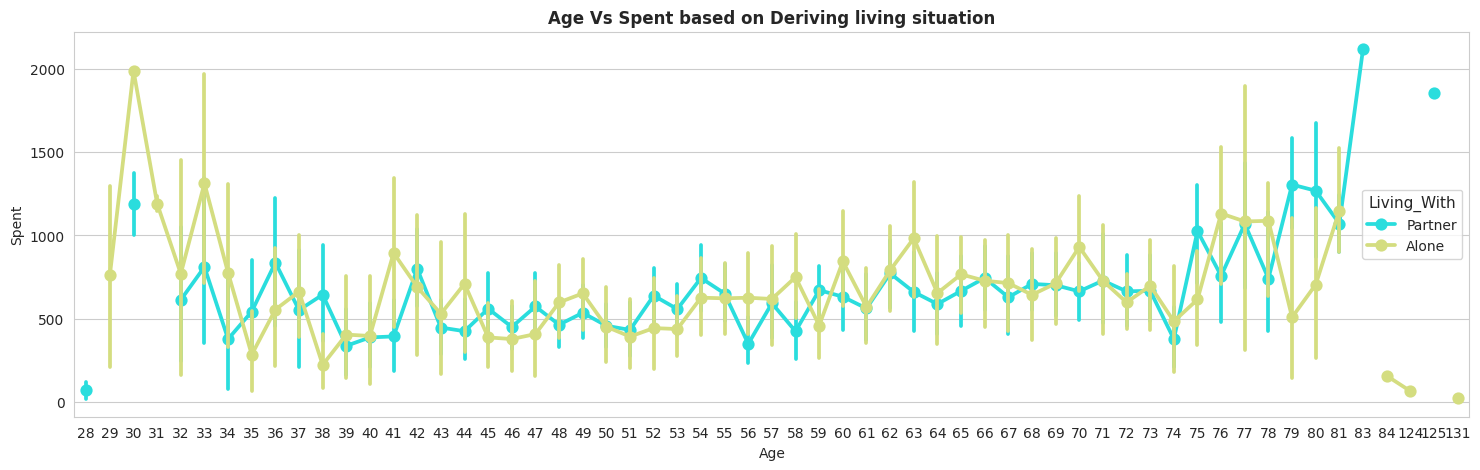

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set_style("whitegrid")
sns.pointplot(x=df["Age"], y=df["Spent"], hue=df["Living_With"], ax=ax,palette="rainbow")
ax.set(xlabel='Age', ylabel='Spent')
# Set the legend title to 'Season Name'
ax.legend(title='Living_With', title_fontsize='11')
# Set the title and make it bold
ax.set_title('Age Vs Spent based on Deriving living situation', fontweight='bold')

plt.show()

**Products Analysis**

In [ ]:
# Combining different products

df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [ ]:
#Combining different dataframe into a single column to reduce the number of dimension
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [ ]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome"]
df=df.drop(columns=col_del,axis=1)

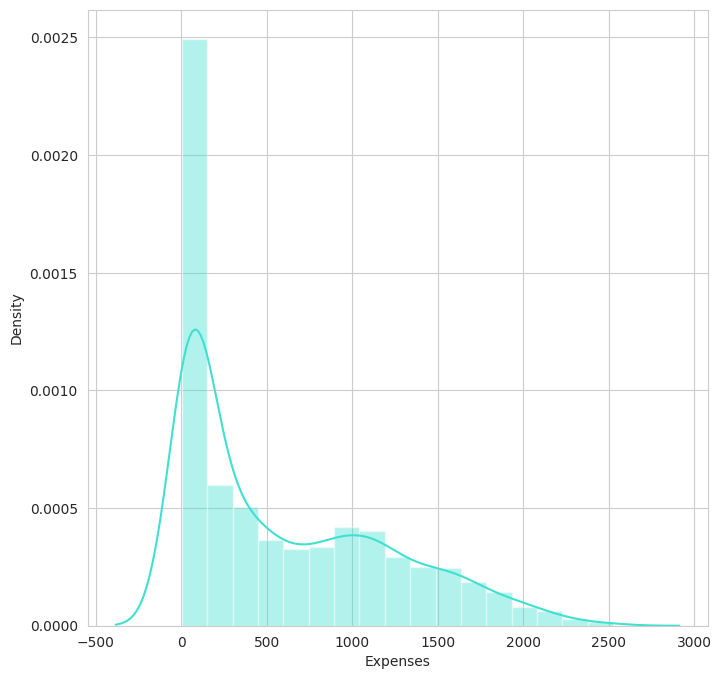

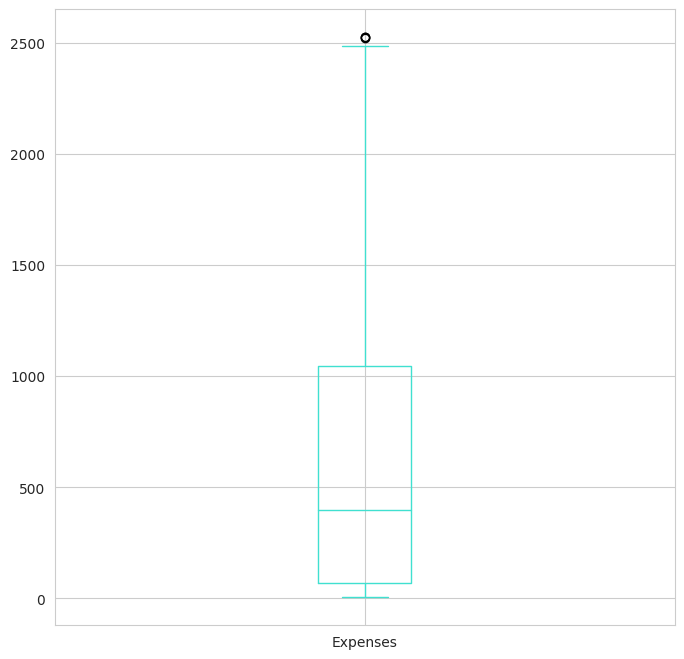

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df["Expenses"],color = 'turquoise')
plt.show()
df["Expenses"].plot.box(figsize=(8,8),color='turquoise')
plt.show()

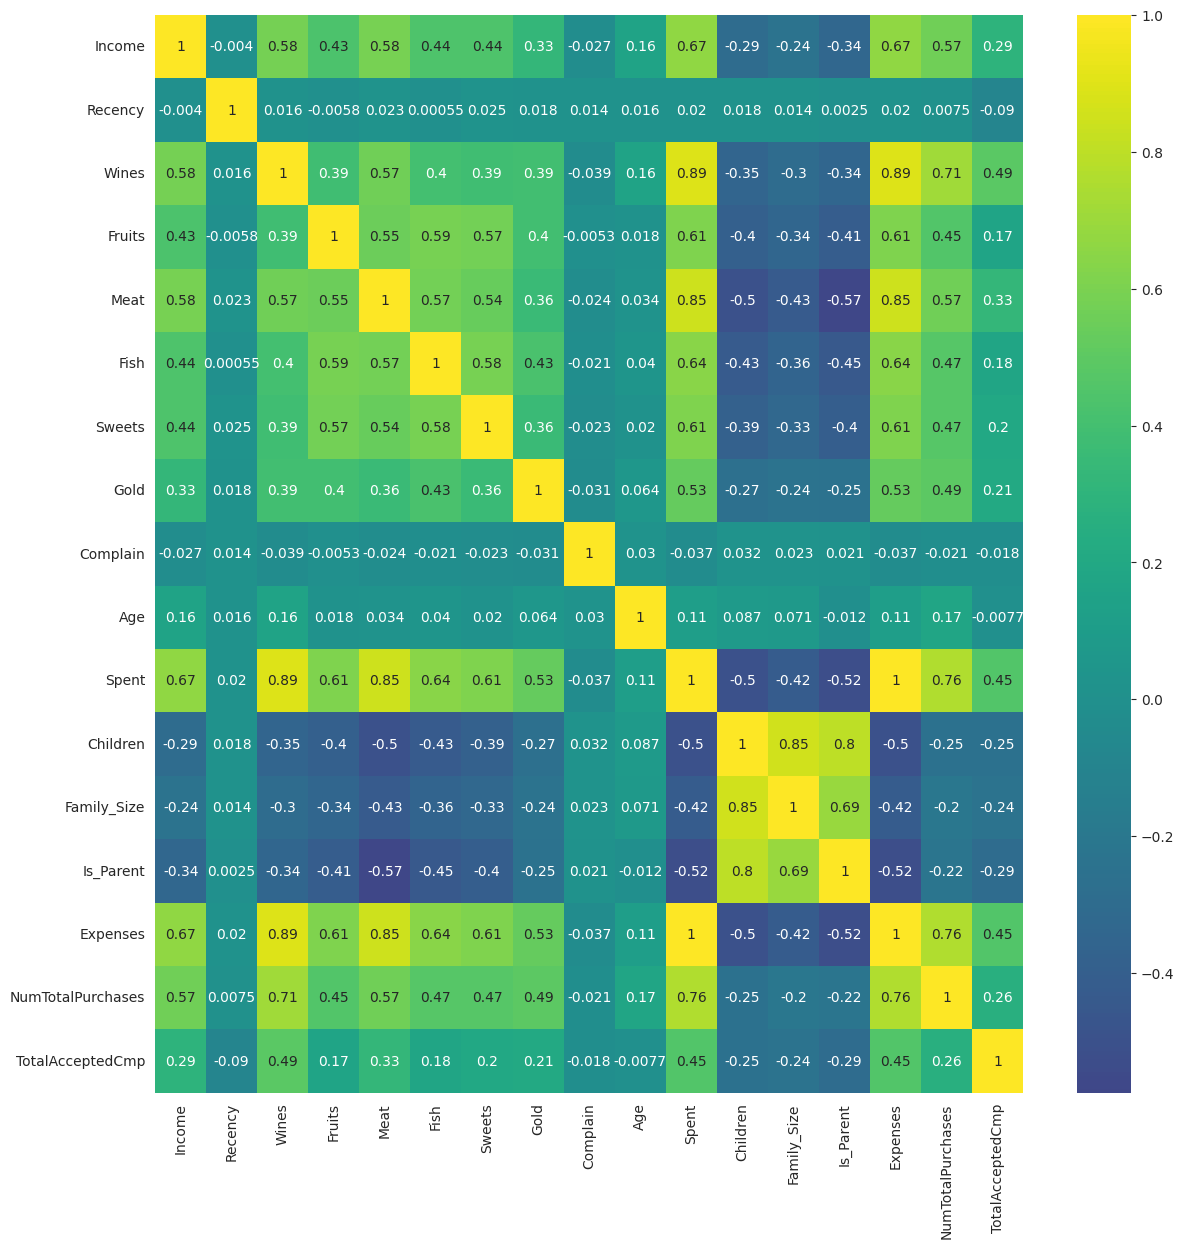

In [ ]:
#correlation matrix
corrmat = df.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(corrmat, annot=True, cmap='viridis', center=0)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Living_With']


In [ ]:
#Label Encoding
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

**Standraize Data**

In [ ]:
# Apply StandardScaler
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(df)

# put scaled data into a dataframe
scaled_df = pd.DataFrame(std_data,columns= df.columns)

**3 - Reduce Data Dimension**

here we use PCA, which is a technique for reducing the dimension with minimizing information loss.

In [ ]:
## Apply PCA on scaled data
pca = PCA(3,svd_solver='full')
pca.fit(scaled_df)
lowdim_df = pca.transform(scaled_df)

In [ ]:
# Put PCA output into a dataframe
columns = ['pca_comp_%i' % i for i in range(3)]
df_pca  = pd.DataFrame(lowdim_df, columns=columns, index=scaled_df.index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2
0,5.268810,-1.029372,-0.320132
1,-2.728141,0.041467,0.775922
2,1.872574,-0.608408,-0.821765
3,-2.573248,-0.460219,-0.805754
4,-0.583359,0.502914,-1.258841


In [ ]:
# Visualize reduced dimension data in a 3d way
fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',size_max=20 ,color_discrete_sequence=['#eae2b7'],
title="PCA Output Visualization")
fig.update_traces(marker=dict(size=8,line=dict(width=2,color='#d62828')),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

**Elbow Method**

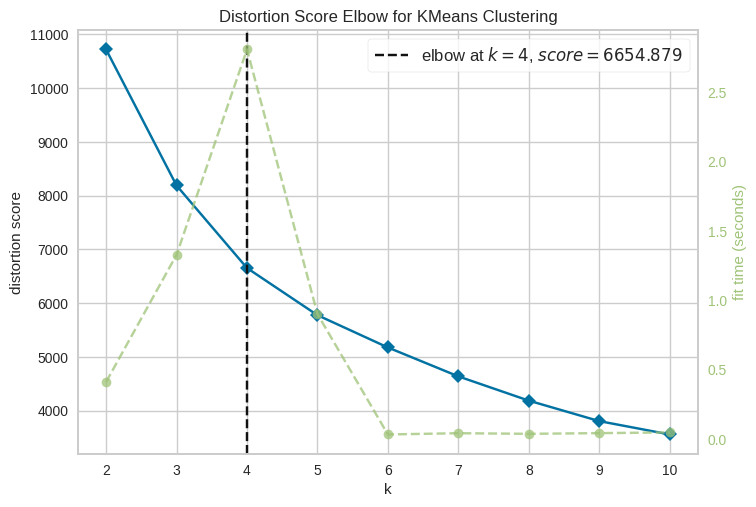

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

Fit reduced dimension data into Kmeans

In [ ]:
KM = KMeans(n_clusters=4)
km_pred = KM.fit_predict(df_pca)

In [ ]:
# add predicted clusters for each data point into dataframe
df["Cluster"]= km_pred

# add predicted clusters for each data point into reduced dimension data
df_pca["Cluster"] = km_pred

In [ ]:
# Visualize clusterd reduced dimension data in a 3d way

fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',
title="Clusters Visualization",color="Cluster")
fig.update_traces(marker=dict(size=4),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

Total members of each cluster :
0    837
1    503
3    489
2    387
Name: Cluster, dtype: int64
**************************************************


Text(0.5, 1.0, 'Total members of each cluster')

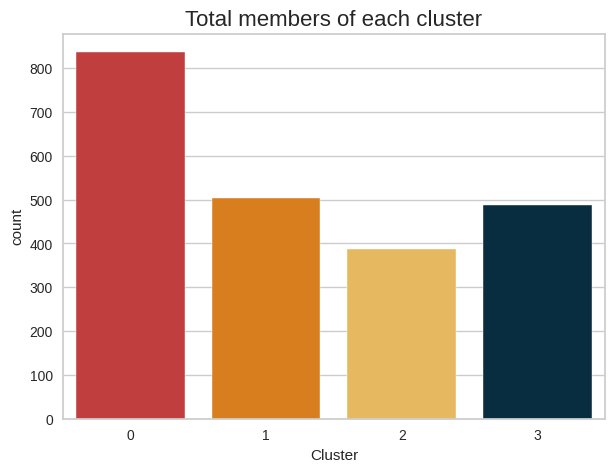

In [ ]:
cprint('Total members of each cluster :','green')
print(df['Cluster'].value_counts())
cprint('*'*50,'green')
plt.rcParams['figure.figsize'] = (7, 5)
countcluster=sns.countplot(x='Cluster', data=df,palette=colorpalt)
countcluster.set_title('Total members of each cluster',fontsize=16)

             Income   Spent
Cluster                    
0        32389765.0  114872
1        38289317.0  717370
2        13524040.0   63783
3        31576787.0  449254
**************************************************


Text(0.5, 1.0, 'Income vs Spent of each cluster')

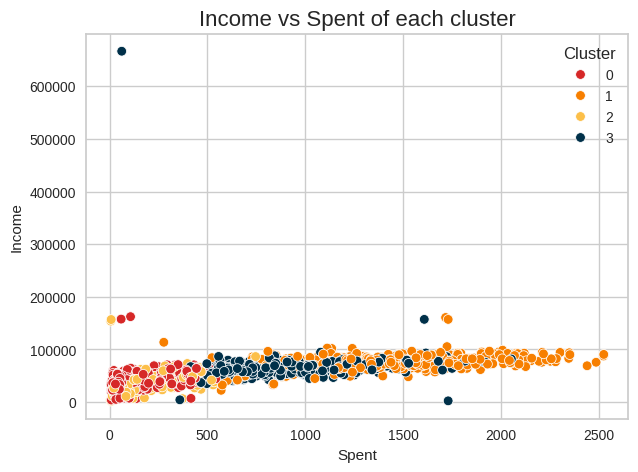

In [ ]:
# sum Income,TotslSpent in each Cluster
print(df.groupby(['Cluster'])['Income','Spent'].agg('sum'))
cprint('*'*50,'green')
spentscatter = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"], palette= colorpalt)
spentscatter.set_title('Income vs Spent of each cluster',fontsize=16)